In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

In [ ]:
# Step 1 Load the dataset

# Mounting your Google Drive

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Step 1: Load the csv file
file_path = '/content/drive/My Drive/Colab Notebooks/ThoraricSurgery.csv'
data = pd.read_csv(file_path)

# Step 2: Display basic info
print("Dataset Info:")
data.info()

Mounted at /content/drive
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       470 non-null    int64  
 1   DGN      470 non-null    object 
 2   PRE4     470 non-null    float64
 3   PRE5     470 non-null    float64
 4   PRE6     470 non-null    object 
 5   PRE7     470 non-null    object 
 6   PRE8     470 non-null    object 
 7   PRE9     470 non-null    object 
 8   PRE10    470 non-null    object 
 9   PRE11    470 non-null    object 
 10  PRE14    470 non-null    object 
 11  PRE17    470 non-null    object 
 12  PRE19    470 non-null    object 
 13  PRE25    470 non-null    object 
 14  PRE30    470 non-null    object 
 15  PRE32    470 non-null    object 
 16  AGE      470 non-null    int64  
 17  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(2), object(14)
memory usage: 66.2+ KB


In [ ]:
# Step 2: Explore the dataset
print("Dataset Shape:", data.shape)
print(data.info())
print(data.head())

Dataset Shape: (470, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       470 non-null    int64  
 1   DGN      470 non-null    object 
 2   PRE4     470 non-null    float64
 3   PRE5     470 non-null    float64
 4   PRE6     470 non-null    object 
 5   PRE7     470 non-null    object 
 6   PRE8     470 non-null    object 
 7   PRE9     470 non-null    object 
 8   PRE10    470 non-null    object 
 9   PRE11    470 non-null    object 
 10  PRE14    470 non-null    object 
 11  PRE17    470 non-null    object 
 12  PRE19    470 non-null    object 
 13  PRE25    470 non-null    object 
 14  PRE30    470 non-null    object 
 15  PRE32    470 non-null    object 
 16  AGE      470 non-null    int64  
 17  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(2), object(14)
memory usage: 66.2+ KB
None
   id   DGN  PRE4  PRE5  PRE6 PRE7 PRE8 P

In [ ]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 id         0
DGN        0
PRE4       0
PRE5       0
PRE6       0
PRE7       0
PRE8       0
PRE9       0
PRE10      0
PRE11      0
PRE14      0
PRE17      0
PRE19      0
PRE25      0
PRE30      0
PRE32      0
AGE        0
Risk1Yr    0
dtype: int64


In [ ]:
# Step 3: Visualizations
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


ValueError: could not convert string to float: 'DGN2'

<Figure size 1000x600 with 0 Axes>

<ipython-input-15-2985c3bfe82d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Risk1Yr', data=data, palette='pastel')


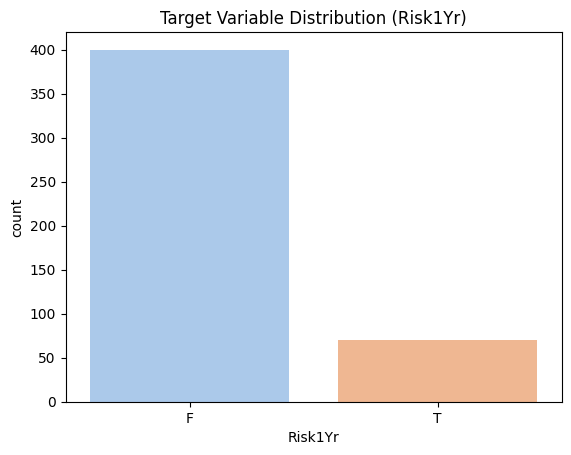

In [ ]:
# Distribution of target variable
sns.countplot(x='Risk1Yr', data=data, palette='pastel')
plt.title('Target Variable Distribution (Risk1Yr)')
plt.show()


In [ ]:
# Example scatter plot of two features
sns.scatterplot(x='Age', y='Forced_Vital_Capacity', hue='Risk1Yr', data=data, palette='coolwarm')
plt.title("Scatter Plot of Age vs. Forced Vital Capacity")
plt.show()

ValueError: Could not interpret value `Age` for `x`. An entry with this name does not appear in `data`.

In [ ]:
# Step 4: Data Preparation
# Encode categorical variables if needed
label_encoder = LabelEncoder()
data['DGN'] = label_encoder.fit_transform(data['DGN'])

In [ ]:
# Separate features (X) and target (y)
X = data.drop('Risk1Yr', axis=1)
y = data['Risk1Yr']

In [28]:
# Assuming 'object' type columns are categorical, convert them to numerical using one-hot encoding
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

In [29]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Train/test split using K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [30]:
# Step 5: Build Predictive Models
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt_model, X_scaled, y, cv=kfold, scoring='accuracy')

In [31]:
# Naive Bayes Model
nb_model = GaussianNB()
nb_scores = cross_val_score(nb_model, X_scaled, y, cv=kfold, scoring='accuracy')

In [32]:
# Train on full training data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

dt_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)


Decision Tree Performance:
              precision    recall  f1-score   support

           F       0.78      0.81      0.80        75
           T       0.12      0.11      0.11        19

    accuracy                           0.67        94
   macro avg       0.45      0.46      0.46        94
weighted avg       0.65      0.67      0.66        94



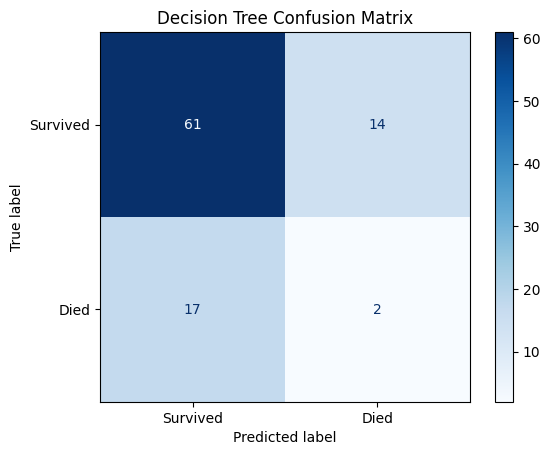

In [33]:
# Step 6: Evaluate Models
# Decision Tree Metrics
print("\nDecision Tree Performance:")
print(classification_report(y_test, y_pred_dt))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, display_labels=['Survived', 'Died'], cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()


Naive Bayes Performance:
              precision    recall  f1-score   support

           F       0.80      0.05      0.10        75
           T       0.20      0.95      0.33        19

    accuracy                           0.23        94
   macro avg       0.50      0.50      0.22        94
weighted avg       0.68      0.23      0.15        94



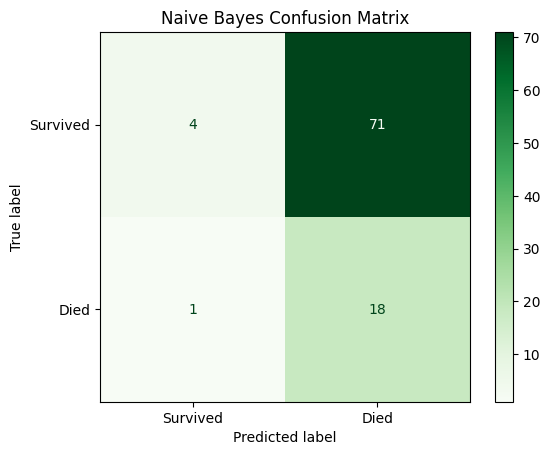

In [34]:
# Naive Bayes Metrics
print("\nNaive Bayes Performance:")
print(classification_report(y_test, y_pred_nb))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb, display_labels=['Survived', 'Died'], cmap='Greens')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

In [35]:
# Step 7: Compare and Conclude
print(f"Decision Tree Average Accuracy: {np.mean(dt_scores):.2f}")
print(f"Naive Bayes Average Accuracy: {np.mean(nb_scores):.2f}")

if np.mean(dt_scores) > np.mean(nb_scores):
    print("Decision Tree outperformed Naive Bayes.")
else:
    print("Naive Bayes outperformed Decision Tree.")

Decision Tree Average Accuracy: 0.75
Naive Bayes Average Accuracy: 0.16
Decision Tree outperformed Naive Bayes.
